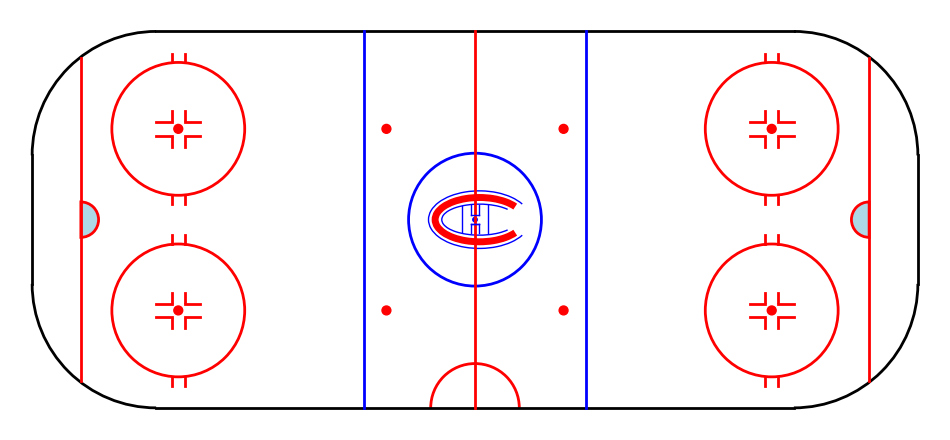

In [172]:
#These libraries are useful for importing functions to facilitate the creation of shapes
#I have made a ice hockey skating rink.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc, Wedge #really helpful with shapes
from matplotlib.lines import Line2D #helpful to draw lines 

def draw_hockey_rink():
    fig, rink = plt.subplots(figsize=(12, 6)) #set figure

    # NHL rink dimensions (feet)
    rink_length = 200
    rink_width = 85
    corner_radius = 28
    goal_line_length = 73
    faceoff_circle_diameter = 30
    faceoff_circle_radius = faceoff_circle_diameter / 2
    neutral_zone_width = 50
    dist_from_center_to_blue_line = neutral_zone_width / 2
    distance_from_board_to_goalline = 11
    width_crease = 8
    dist_dot_from_goal_inzone = 22
    faceoff_zone_from_goalline = dist_dot_from_goal_inzone + distance_from_board_to_goalline
    dist_board_from_dot_iny = (rink_width - 44) / 2

    # Set extremas of figure
    rink.set_xlim(-rink_length/2 - 5, rink_length/2 + 5)
    rink.set_ylim(-rink_width/2 - 5, rink_width/2 + 5)

    # Side of ice rink
    rink.add_line(Line2D([-rink_length/2 + corner_radius, rink_length/2 - corner_radius], #horizontal without corners
                         [rink_width/2, rink_width/2], color="black", linewidth=2))
    rink.add_line(Line2D([-rink_length/2 + corner_radius, rink_length/2 - corner_radius],
                         [-rink_width/2, -rink_width/2], color="black", linewidth=2))
    rink.add_line(Line2D([-rink_length/2, -rink_length/2], #vertical without corners
                         [-rink_width/2 + corner_radius, rink_width/2 - corner_radius],
                         color="black", linewidth=2))
    rink.add_line(Line2D([rink_length/2, rink_length/2],
                         [-rink_width/2 + corner_radius, rink_width/2 - corner_radius],
                         color="black", linewidth=2))

    # 4 corner arcs
    corners = [(-rink_length/2+corner_radius, rink_width/2-corner_radius, 90, 180),
               (rink_length/2-corner_radius, rink_width/2-corner_radius, 0, 90),
               (-rink_length/2+corner_radius, -rink_width/2+corner_radius, 180, 270),
               (rink_length/2-corner_radius, -rink_width/2+corner_radius, 270, 360)]
    for (x, y, t1, t2) in corners:#corners with corner radius
        rink.add_patch(Arc((x, y), 2*corner_radius, 2*corner_radius,
                           theta1=t1, theta2=t2, linewidth=2, color="black"))

    # blue,center and goal line
    rink.add_line(Line2D([0, 0], [-rink_width/2, rink_width/2], color="red", linewidth=2))  # Center line
    for x in [-dist_from_center_to_blue_line, dist_from_center_to_blue_line]:
        rink.add_line(Line2D([x, x], [-rink_width/2, rink_width/2], color="blue", linewidth=2))  # Blue lines
    for x in [rink_length/2 - distance_from_board_to_goalline, -rink_length/2 + distance_from_board_to_goalline]:
        rink.add_line(Line2D([x, x], [-goal_line_length/2, goal_line_length/2], color="red", linewidth=2))  # Goal lines

    # Adding circles for faceoffs
    rink.add_patch(Circle((0, 0), faceoff_circle_radius, edgecolor="blue", facecolor="none", linewidth=2))

    faceoff_x = [(rink_length/2 - faceoff_zone_from_goalline), -(rink_length/2 - faceoff_zone_from_goalline)]
    faceoff_y = [dist_board_from_dot_iny, -dist_board_from_dot_iny]
    for x in faceoff_x:
        for y in faceoff_y:
            rink.add_patch(Circle((x, y), faceoff_circle_diameter/2, edgecolor="red", facecolor="none", linewidth=2))

    # goalie creases
    rink.add_patch(Wedge(center=(-rink_length/2 + distance_from_board_to_goalline, 0),
                         r=width_crease/2, theta1=270, theta2=90,
                         facecolor="lightblue", edgecolor="red", linewidth=2))
    rink.add_patch(Wedge(center=(rink_length/2 - distance_from_board_to_goalline, 0),
                         r=width_crease/2, theta1=90, theta2=270,
                         facecolor="lightblue", edgecolor="red", linewidth=2))

    # dots to drop the puck
    dots = []
    for x in [-(neutral_zone_width-2*5)/2, (neutral_zone_width-2*5)/2]:
        for y in [-dist_board_from_dot_iny, dist_board_from_dot_iny]:
            dots.append((x, y))
    for x in faceoff_x:
        for y in faceoff_y:
            dots.append((x, y))
    for (x, y) in dots:
        rink.add_patch(Circle((x, y), 1, color="red"))

    rink.add_patch(Circle((0,0), 0.5, color="blue"))

    # hashmarks
    hashmark_length = 2
    hashmark_gap = 3
    for x in faceoff_x:
        for y in faceoff_y:
            # top/bottom vertical marks
            rink.add_line(Line2D([x - hashmark_gap/2, x - hashmark_gap/2],
                                 [y - faceoff_circle_radius, y - faceoff_circle_radius - hashmark_length],
                                 color="red", linewidth=2))
            rink.add_line(Line2D([x + hashmark_gap/2, x + hashmark_gap/2],
                                 [y - faceoff_circle_radius, y - faceoff_circle_radius - hashmark_length],
                                 color="red", linewidth=2))
            rink.add_line(Line2D([x - hashmark_gap/2, x - hashmark_gap/2],
                                 [y + faceoff_circle_radius, y + faceoff_circle_radius + hashmark_length],
                                 color="red", linewidth=2))
            rink.add_line(Line2D([x + hashmark_gap/2, x + hashmark_gap/2],
                                 [y + faceoff_circle_radius, y + faceoff_circle_radius + hashmark_length],
                                 color="red", linewidth=2))

            # middle verticals
            rink.add_line(Line2D([x - hashmark_gap/2, x - hashmark_gap/2],
                                 [y + 2, y + 2 + hashmark_length], color="red", linewidth=2))
            rink.add_line(Line2D([x + hashmark_gap/2, x + hashmark_gap/2],
                                 [y + 2, y + 2 + hashmark_length], color="red", linewidth=2))
            rink.add_line(Line2D([x - hashmark_gap/2, x - hashmark_gap/2],
                                 [y - 2, y - 2 - hashmark_length], color="red", linewidth=2))
            rink.add_line(Line2D([x + hashmark_gap/2, x + hashmark_gap/2],
                                 [y - 2, y - 2 - hashmark_length], color="red", linewidth=2))

            # horizontal hashmarks
            rink.add_line(Line2D([x - hashmark_gap/2, x - 5],
                                 [y - hashmark_gap/2, y - hashmark_gap/2], color="red", linewidth=2))
            rink.add_line(Line2D([x - hashmark_gap/2, x - 5],
                                 [y + hashmark_gap/2, y + hashmark_gap/2], color="red", linewidth=2))
            rink.add_line(Line2D([x + hashmark_gap/2, x + 5],
                                 [y - hashmark_gap/2, y - hashmark_gap/2], color="red", linewidth=2))
            rink.add_line(Line2D([x + hashmark_gap/2, x + 5],
                                 [y + hashmark_gap/2, y + hashmark_gap/2], color="red", linewidth=2))

    # Ref crease
    rink.add_patch(Arc((0, -rink_width/2), width=20, height=20, theta1=0, theta2=180,
                       color="red", linewidth=2))

    # Habs logo (Purely pleasure) hard coded
    rink.add_patch(Arc((1,0), 20, 10, theta1=20, theta2=340, color="red", linewidth=5))
    rink.add_patch(Arc((1,0), 23, 13, theta1=20, theta2=340, color="blue", linewidth=1))
    rink.add_patch(Arc((1,0), 17, 7, theta1=20, theta2=340, color="blue", linewidth=1))
    rink.add_line(Line2D([-3,-3],[3,-2.7], color="blue",linewidth=1))
    rink.add_line(Line2D([-1,-1],[3.2,1], color="blue",linewidth=1))
    rink.add_line(Line2D([-1,-1],[-3,-1], color="blue",linewidth=1))
    rink.add_line(Line2D([1,1],[-3,-1], color="blue",linewidth=1))
    rink.add_line(Line2D([1,1],[3.4,1], color="blue",linewidth=1))
    rink.add_line(Line2D([3,3],[3.4,-3], color="blue",linewidth=1))
    rink.add_line(Line2D([-1,1],[1,1], color="blue",linewidth=1))
    rink.add_line(Line2D([-1,1],[-1,-1], color="blue",linewidth=1))
    rink.add_line(Line2D([-1,1],[-1,-1], color="blue",linewidth=1))

    #Random skater just to try
    #plt.plot(-30,20, marker='o')

    # Display
    rink.axis("off")
    rink.set_aspect("equal")
    plt.savefig("hockey_rink.png")#save as png as asked
    plt.show()

draw_hockey_rink()
